# Deskripsi Proyek

disini saya melakukan analisis penjualan di sebuah perusahaan Y.Afisha disini tersedia data:

- Log/catatan server yang memuat data kunjungan ke situs Y.Afisha dari bulan Januari 2017 hingga bulan Desember 2018
- File dump yang memuat semua pesanan untuk periode tersebut
- Statistik biaya pemasaran

saya akan melihat pola pembelian menggunakan data tersebut dab menganalisis source_id(iklan) mana yang paling menghasilkan keuntungan pada perusahaan

In [1]:
#memuat tipe library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
#memuat dataset yang diperlukan
data_visits = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv')
data_orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv')
data_costs = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv')

In [3]:
#melakukan konversi agar nama kolom pada dataset menggunakan huruf kecil
#melakukan konversi tipe data dalam suatu kolom agar tipe datanya datetime
data_visits.columns = data_visits.columns.str.lower()
data_visits['start ts'] = pd.to_datetime(data_visits['start ts'])
data_visits['end ts'] = pd.to_datetime(data_visits['end ts'])
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [4]:
#melakukan konversi agar nama kolom pada dataset menggunakan huruf kecil
#melakukan konversi tipe data dalam suatu kolom agar tipe datanya datetime
data_orders.columns = data_orders.columns.str.lower()
data_orders['buy ts'] = pd.to_datetime(data_orders['buy ts'])
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [5]:
#melakukan konversi agar nama kolom pada dataset menggunakan huruf kecil
#melakukan konversi tipe data dalam suatu kolom agar tipe datanya datetime
data_costs.columns = data_costs.columns.str.lower()
data_costs['dt'] = pd.to_datetime(data_costs['dt'])
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Produk

In [6]:
#melakukan ekstraksi pada kolom buy ts(pembelian)untuk mengetahui pembelian dalam tanggal, minggu keberapa dan bulan pembelian
data_orders['day'] = data_orders['buy ts'].dt.date
data_orders['week'] = data_orders['buy ts'].dt.weekday
data_orders['month'] = data_orders['buy ts'].dt.month
data_orders

,buy ts,revenue,uid,day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,3,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,3,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,3,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,3,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,6
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,3,5
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,3,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,3,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,3,5


## Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?

In [37]:
data = data_orders.groupby('day')['uid'].count().reset_index()
plt.figure(figsize=(20,15))
px.histogram(data_frame=data,x='day',y='uid')

<Figure size 2000x1500 with 0 Axes>

total pembelian tertinggi terjadi di bulan januari 2018 dengan pembelian mencapai 6218 customer

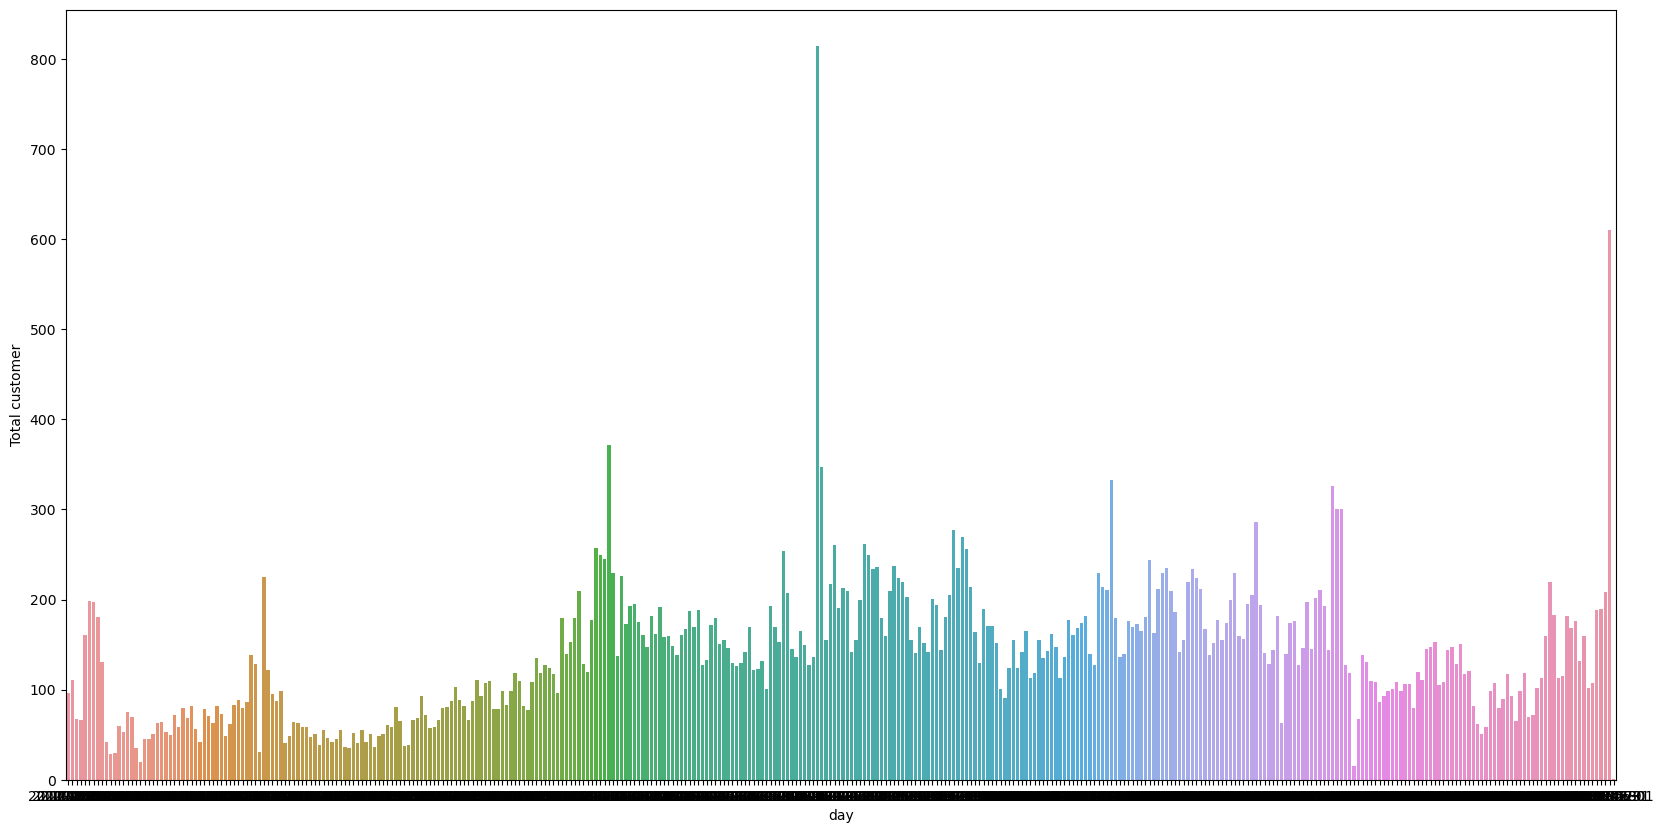

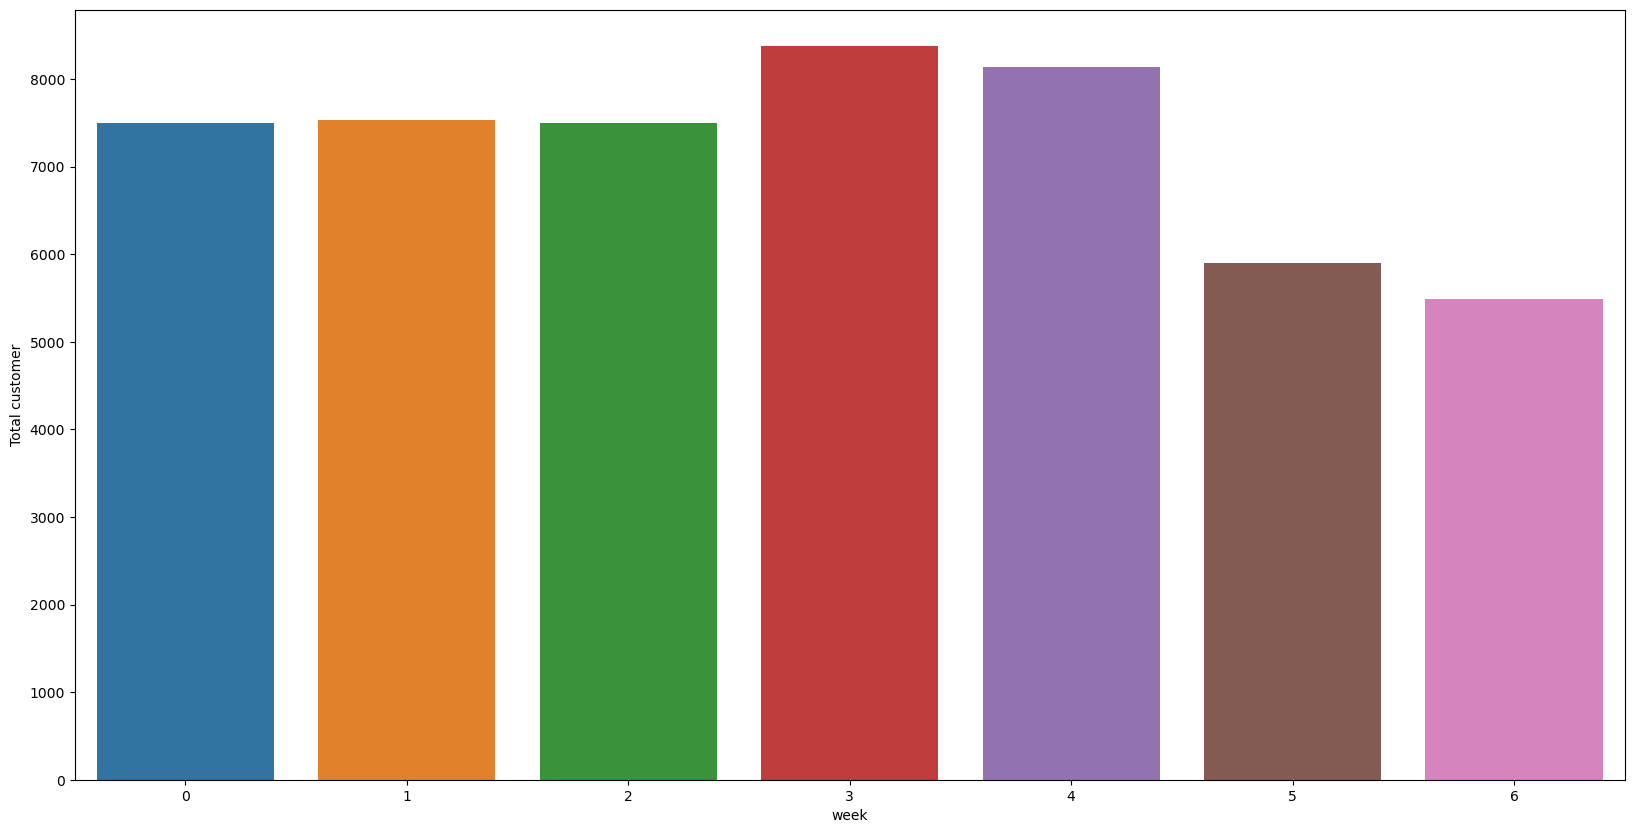

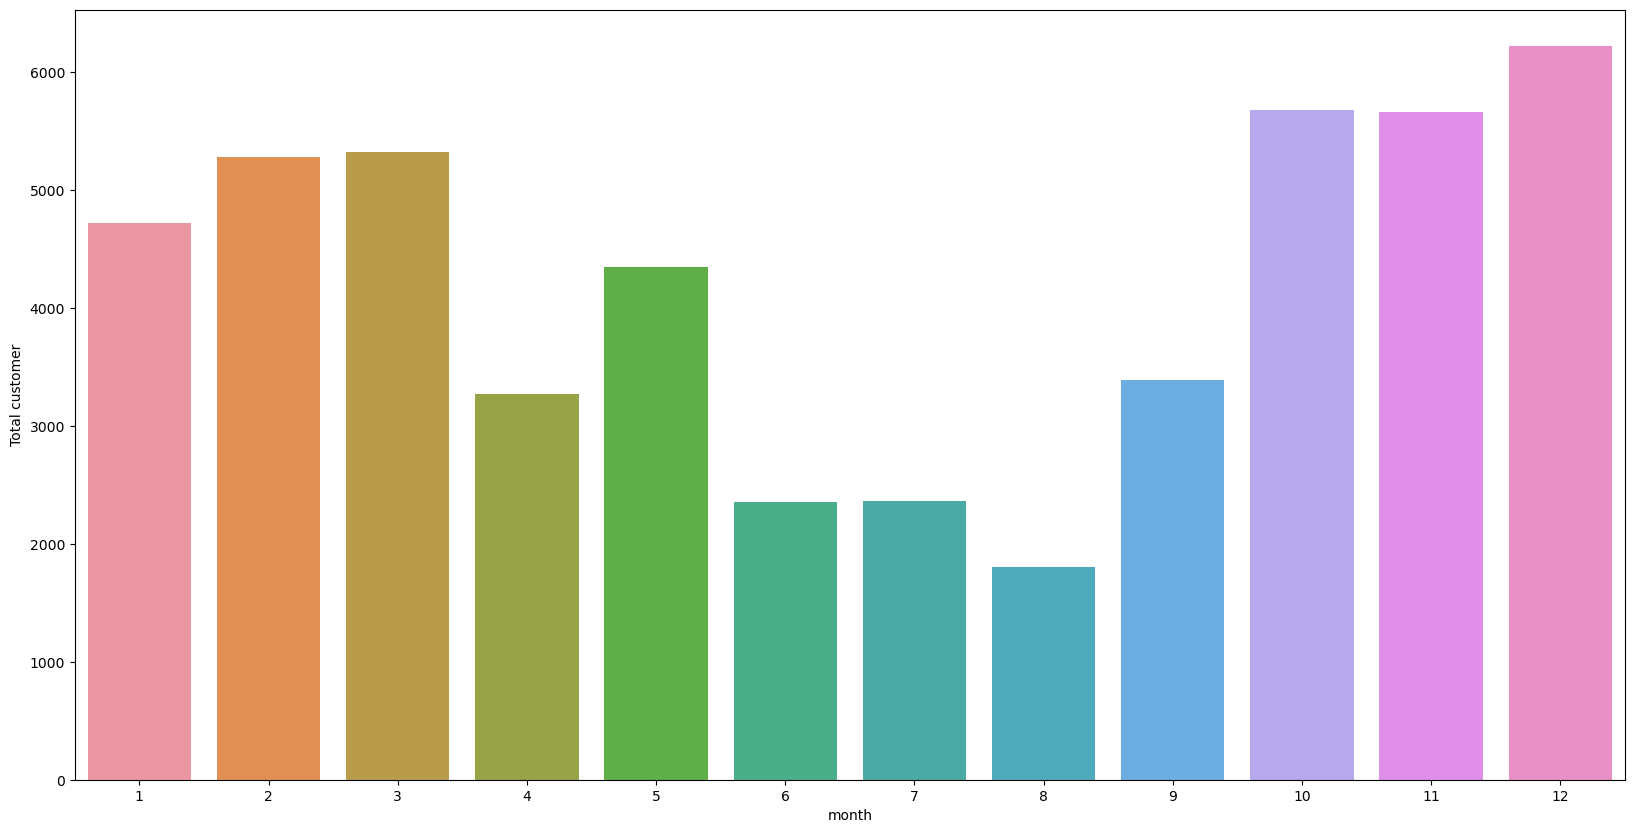

In [8]:
param = ['day','week','month']
for i in param:
    plt.figure(figsize=(20,10))
    sns.barplot(data = data_orders.groupby(i)['uid'].count().reset_index(),x=i,y='uid',label=i)
    plt.xlabel(i)
    plt.ylabel('Total customer')

menghitung jumlah pelanggan berdasarkan hari, minggu , dan bulan yang mengunjungi departmen

    - terlihat pada periode harian peak tertinggi ada di 800 customer
    - pada periode mingguan, minggu ke 3 total pelanggan paling tinggi dengan sekitar 8000 customer
    - sedangkan pada periode bulanan bulan ke-12 paling tinggi dikunjungi customer dengan hampir sekitar 600 customer

## Berapa jumlah sesi per harinya? (Satu pengguna mungkin memiliki lebih dari satu sesi).

In [9]:
data_visits['date'] = data_visits['start ts'].dt.date
data_session = data_visits.groupby('date').agg({'uid':['count','nunique']}).reset_index()
data_session['session'] = data_session[('uid', 'count')]/data_session[('uid', 'nunique')]
data_session

date   uid           session
                count nunique          
0    2017-06-01   664     605  1.097521
1    2017-06-02   658     608  1.082237
2    2017-06-03   477     445  1.071910
3    2017-06-04   510     476  1.071429
4    2017-06-05   893     820  1.089024
..          ...   ...     ...       ...
359  2018-05-27   672     620  1.083871
360  2018-05-28  1156    1039  1.112608
361  2018-05-29  1035     948  1.091772
362  2018-05-30  1410    1289  1.093871
363  2018-05-31  2256    1997  1.129695

[364 rows x 4 columns]

melakukan perhitungan jumlah sesi perhari ratarata ada 1 sesi untuks setiap harinya dengan rata-rata 1 uid(customer)melakukan 1 sesi

## Berapa lama durasi untuk setiap sesi?

In [10]:
data_visits['duration'] = ((data_visits['end ts'] - data_visits['start ts']).dt.seconds)/60
data_visits['duration'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: duration, dtype: float64

untuk setiap sesi rata-rata dibutuhkan waktu sekitar 10 menit untuk setiap customer

<AxesSubplot:ylabel='duration'>

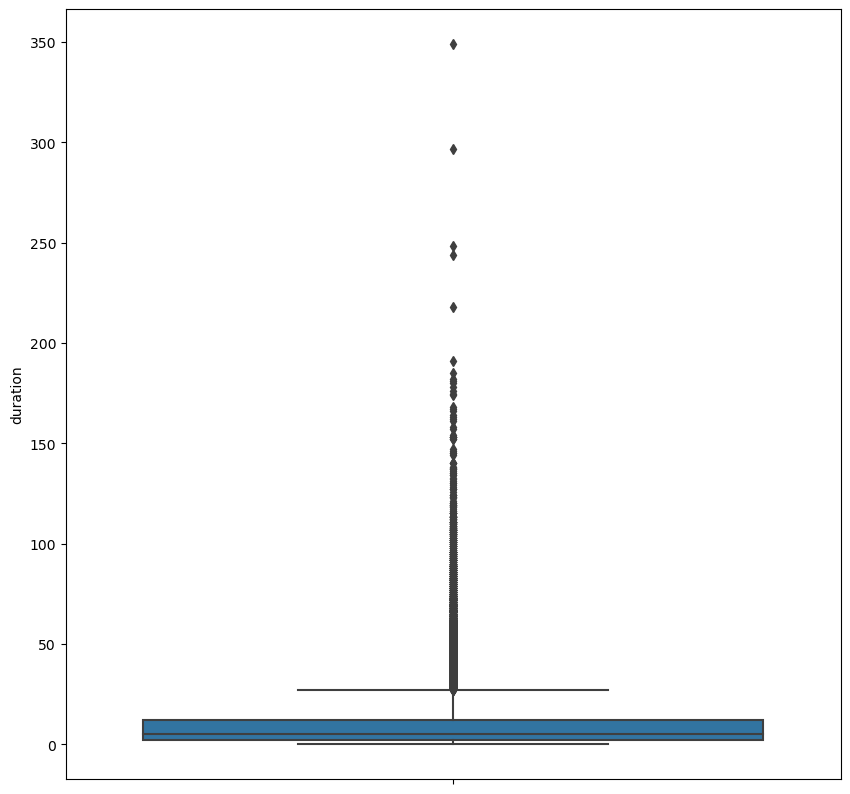

In [11]:
duration = data_visits.groupby('uid')['duration'].mean().reset_index()
plt.figure(figsize=(10,10))
sns.boxplot(data=duration,y='duration')

<AxesSubplot:ylabel='duration'>

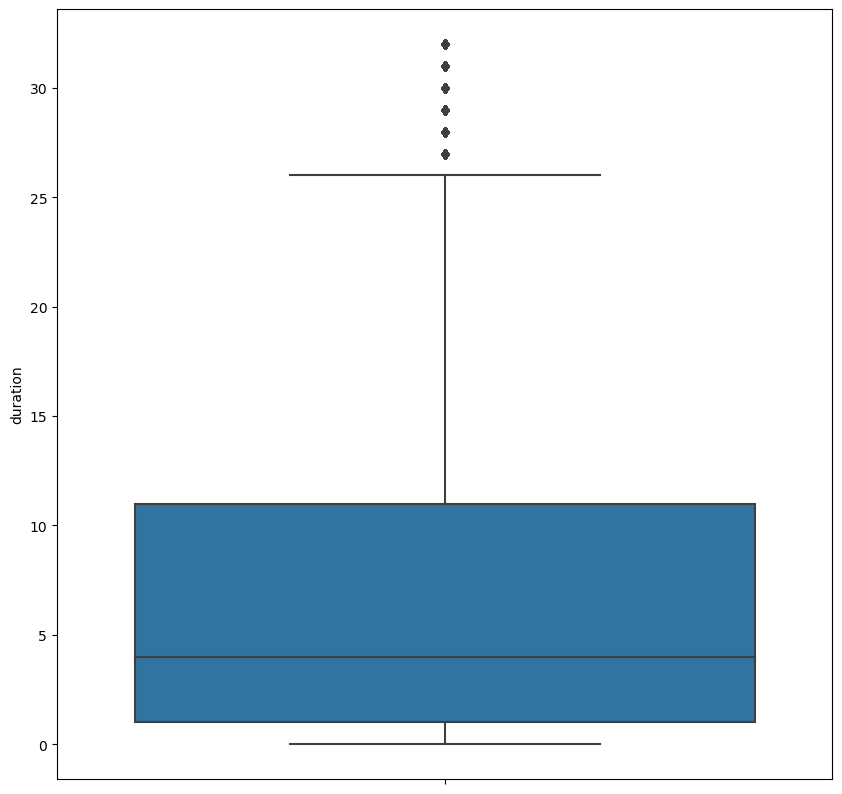

In [12]:
#melihat data pelanggan yang sering menggunakan produk tanpa outlier
q1=data_visits['duration'].quantile(0.25)
q3=data_visits['duration'].quantile(0.75)
iqr = q3-q1

lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)


new_data = data_visits[(data_visits['duration']>=lower_bound)&(data_visits['duration']<=upper_bound)]
plt.figure(figsize=(10,10))
sns.boxplot(data=new_data,y='duration')

In [13]:
(new_data['duration']/60).describe()

count    334742.000000
mean          0.123683
std           0.132465
min           0.000000
25%           0.016667
50%           0.066667
75%           0.183333
max           0.533333
Name: duration, dtype: float64

dengan outlier data, pelanggan rata rata menghabiskan waktu 7,5 menit untuk sekali sesi

## Seberapa sering pengguna kembali menggunakan produk?

In [14]:
freq=data_visits[['uid','start ts']].sort_values(by='uid').reset_index(drop=True)
freq['diff'] = abs(freq['start ts'].diff().dt.days)
mask = freq['uid']!=freq['uid'].shift(1)
freq.loc[mask,'diff']=np.nan
freq = freq[freq['diff'].notna()]
freq['diff'].describe()

count    131231.000000
mean         60.259367
std          70.815866
min           0.000000
25%           5.000000
50%          32.000000
75%          94.000000
max         363.000000
Name: diff, dtype: float64

Rata- rata pengunjung kembali menggunakan produk setiap 60 hari

# Penjualan

## Kapan orang-orang mulai melakukan pembelian? berdasarkan source id

In [15]:
data_visits['first_visit'] = data_visits.groupby('uid')['start ts'].transform('min')
data_orders['first_order'] = data_orders.groupby('uid')['buy ts'].transform('min')
first_buy = data_visits.merge(data_orders,on='uid')
first_buy['first_buy'] = (first_buy['first_order'] - first_buy['first_visit'])
buy_first = first_buy.groupby(['source id','uid'])['first_buy'].mean().reset_index()
buy_first

,source id,uid,first_buy
0,1,16118742129536584,0 days 00:04:00
1,1,19133919191467791,0 days 00:24:00
2,1,21801295586117262,0 days 00:00:00
3,1,22538937500067142,2 days 15:03:00
4,1,28094489227360733,21 days 00:29:00
...,...,...,...
57260,10,18395646263390717328,156 days 00:44:00
57261,10,18396814330834213531,0 days 00:01:00
57262,10,18404053948371855220,0 days 20:31:00
57263,10,18426177306662320975,6 days 23:57:00


pada bagian ini saya mengurutkan customer berdasarkan source id, dan mencari kapan pembelian pertama setelah pertama kali customer melakukan visit

## cohort analysis, mencari total pesanan dalam bulan

In [16]:
data_visits['cohort_visit']=data_visits['start ts'].dt.to_period('M')
cohort_visits = data_visits.groupby('uid')['cohort_visit'].min().to_dict()

membuat dictionary untuk melihat kapan visit pertama dilakukan oleh pelanggan

In [17]:
data_orders['cohort_visits'] = data_orders['uid'].map(cohort_visits)
data_orders['buy_month'] = data_orders['first_order'].dt.to_period('M')
data_orders['diff_visit'] = data_orders.apply(lambda x:x['buy_month'].month - x['cohort_visits'].month if x['cohort_visits'].year == x['buy_month'].year else((x['buy_month'].year - x['cohort_visits'].year)*12)+ x['buy_month'].month - x['cohort_visits'].month,axis=1)
data_orders

,buy ts,revenue,uid,day,week,month,first_order,cohort_visits,buy_month,diff_visit
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,3,6,2017-06-01 00:10:00,2017-06,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,3,6,2017-06-01 00:25:00,2017-06,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,3,6,2017-06-01 00:27:00,2017-06,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,3,6,2017-06-01 00:29:00,2017-06,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,6,2017-06-01 07:58:00,2017-06,2017-06,0
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,3,5,2018-05-31 23:50:00,2018-05,2018-05,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,3,5,2018-05-31 23:50:00,2018-05,2018-05,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,3,5,2018-05-31 23:54:00,2018-05,2018-05,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,3,5,2018-05-31 23:56:00,2017-10,2018-05,7


mencari lama waktu yang dibutuhkan customer dari pertama dia melakukan visit. Pada bagian ini saya mengelompokkan pelanggan berdasarkan cohort waktu pertama customer visit setelah itu mencari dari waktu dia pertama visit berapa lama dia melakukan pembelian

<AxesSubplot:xlabel='diff_visit', ylabel='cohort_visits'>

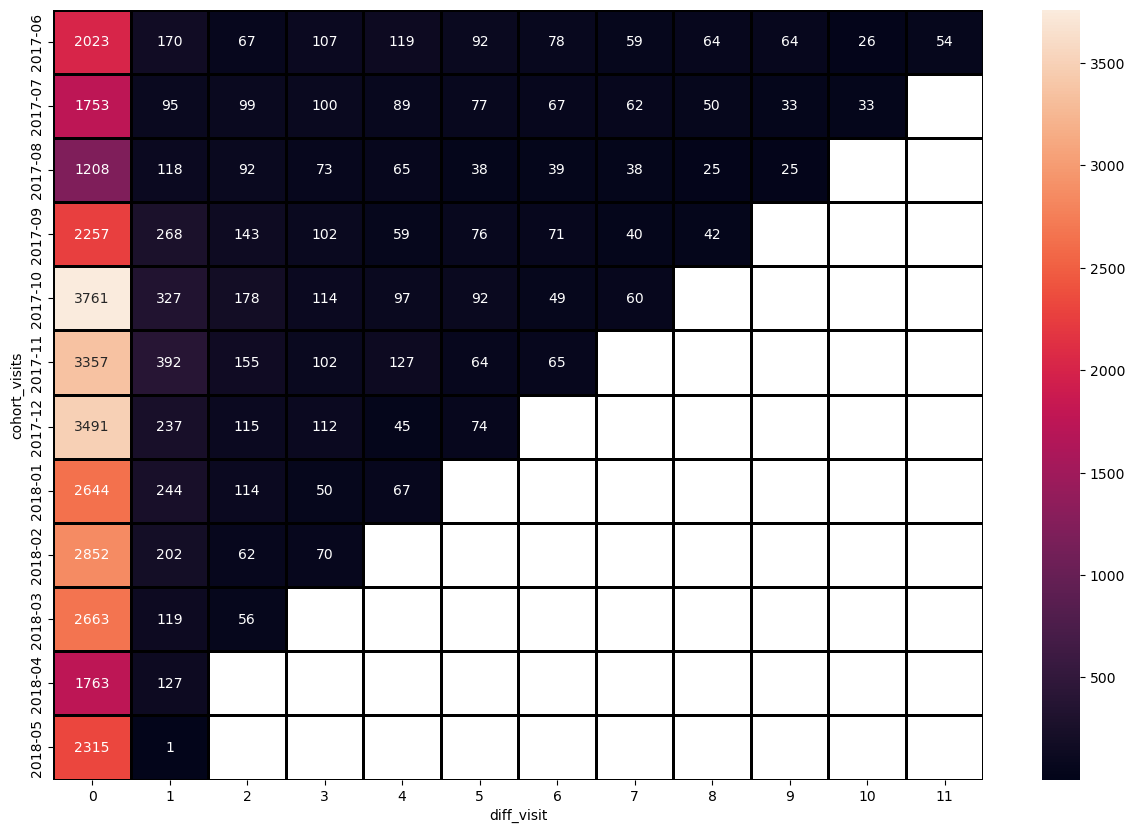

In [18]:
a= data_orders.groupby(['diff_visit','cohort_visits'])['uid'].nunique().reset_index()
b = a.pivot_table(index='cohort_visits',columns='diff_visit',values='uid')
plt.figure(figsize=(15,10))
sns.heatmap(data=b,annot = True,fmt = '.0f',linewidth='1',linecolor='black')

mencari total barang terjual berdasarkan cohort bulanan, untuk setiap tahun pembelian terlihat menurun dari satu bulan ke bulan lainnya, mungkin ada faktor yang mempengaruhi penurunan ini

Text(0.5, 102.72222222222219, 'Diff Buy from cohort')

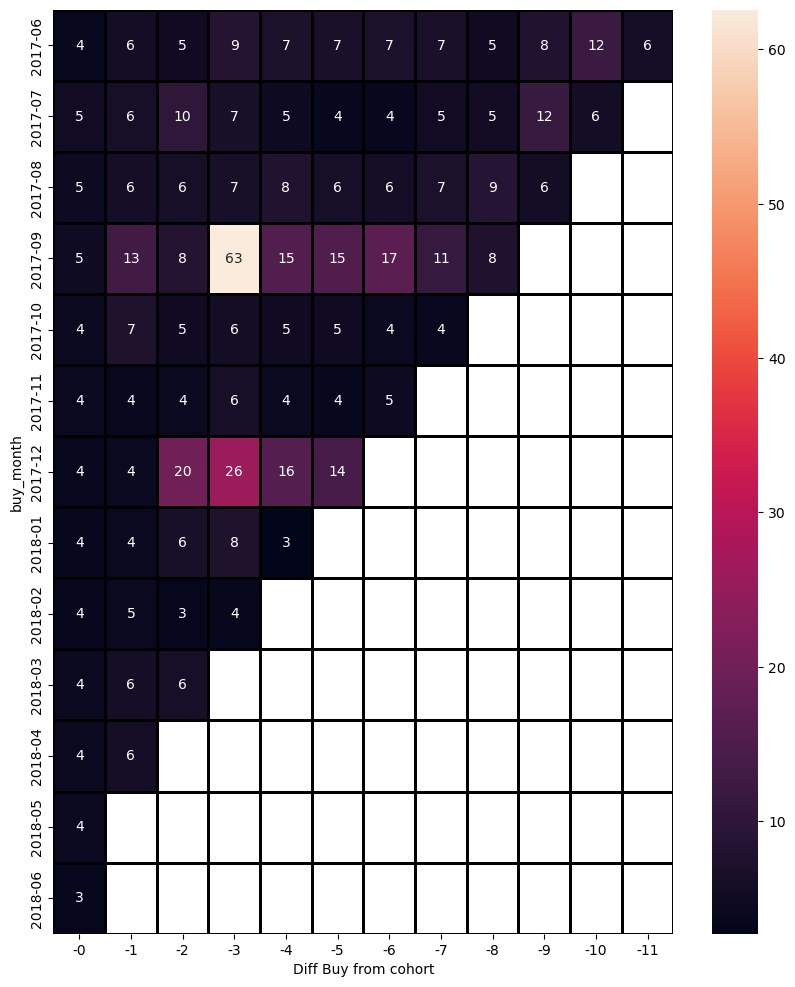

In [19]:
data_orders['diff_buy'] = data_orders.apply(lambda x : x['buy ts'].month - x['buy_month'].month if x['buy ts'].year == x['buy_month'].year else((x['buy ts'].year - x['buy_month'].year)*12)+x['buy ts'].month-x['buy_month'].month,axis=1)
c = data_orders.groupby(['diff_buy','buy_month']).agg({'revenue':['sum','count']}).reset_index()
c['mean'] = c['revenue','sum']/c['revenue','count']
d = c.pivot_table(index='buy_month',columns='diff_buy',values='mean')
plt.figure(figsize=(10,12))
sns.heatmap(data=d,annot = True,fmt = '.0f',linewidth='1',linecolor='black')
plt.xlabel('Diff Buy from cohort')

pada bagian ini pertama saya melakukan pengelompokkan pelanggan berdasarkan cohort pembelian( waktu pertama kali customer membeli barang) lalu mencari jarak waktu customer melakukan pembelian kembali untuk mencari total rata-rata pembelian untuk cohort bulanan, terlihat untuk hasil rata-rata per bulannya ada kenaikan di beberapa bulan dan ada kenaikan yang signifikan misalnya di cohort 2017-12 kenaikannya di bulan ke 2 menuju 3 kenaikannya sampai dengan 20 untuk rata-rata pembeliannya, mungkin ini dipengaruhi ada event natal dan tahun baru

## Berapa jumlah uang yang mereka kontribusikan? (LTV)

In [20]:
#mencari ltv 

c.sort_values(by='buy_month')
c['ltv'] = c['revenue','sum']/c['revenue','count']
c

diff_buy buy_month   revenue             mean        ltv
                            sum count                      
0         0   2017-06   9557.49  2354   4.060106   4.060106
1         0   2017-07  11557.65  2186   5.287123   5.287123
2         0   2017-08   7228.83  1533   4.715479   4.715479
3         0   2017-09  14568.53  2933   4.967109   4.967109
4         0   2017-10  21716.20  4964   4.374738   4.374738
..      ...       ...       ...   ...        ...        ...
74        9   2017-07    282.96    24  11.790000  11.790000
75        9   2017-08    257.53    46   5.598478   5.598478
76       10   2017-06   1155.66    96  12.038125  12.038125
77       10   2017-07    299.36    53   5.648302   5.648302
78       11   2017-06    519.62    86   6.042093   6.042093

[79 rows x 6 columns]

In [21]:
c.pivot_table(index='buy_month',columns='diff_buy',values='ltv')

\
diff_buy         0          1          2          3          4          5    
buy_month                                                                    
2017-06    4.060106   5.547006   5.088161   8.545575   7.084178   6.825321   
2017-07    5.287123   6.446100   9.992083   6.637596   4.721806   3.659512   
2017-08    4.715479   5.987315   6.281200   6.617901   7.962941   6.265323   
2017-09    4.967109  13.171187   8.351056  62.570244  15.430448  15.321835   
2017-10    4.374738   7.405127   5.127469   5.590246   5.098992   5.071553   
2017-11    4.370717   4.103955   4.474670   6.284976   4.441471   3.726780   
2017-12    4.110746   4.226741  20.072772  26.084358  15.948488  14.111048   
2018-01    3.687417   4.438482   6.454969   7.524844   2.711282        NaN   
2018-02    3.706266   4.576486   3.453735   3.867143        NaN        NaN   
2018-03    4.139344   5.972191   6.334489        NaN        NaN        NaN   
2018-04    4.248774   6.204718        NaN        NaN        NaN        NaN   
2018-05    4.286168        NaN        NaN        NaN        NaN        NaN   
2018-06    3.420000        NaN        NaN        NaN        NaN        NaN   

                                                                           
diff_buy          6          7         8          9          10        11  
buy_month                                                                  
2017-06     6.966449   6.761839  5.279009   8.009869  12.038125  6.042093  
2017-07     3.789508   5.454400  5.345690  11.790000   5.648302       NaN  
2017-08     5.890000   7.113590  8.702826   5.598478        NaN       NaN  
2017-09    16.767130  11.206607  7.785574        NaN        NaN       NaN  
2017-10     4.280233   4.009120       NaN        NaN        NaN       NaN  
2017-11     4.598235        NaN       NaN        NaN        NaN       NaN  
2017-12          NaN        NaN       NaN        NaN        NaN       NaN  
2018-01          NaN        NaN       NaN        NaN        NaN       NaN  
2018-02          NaN        NaN       NaN        NaN        NaN       NaN  
2018-03          NaN        NaN       NaN        NaN        NaN       NaN  
2018-04          NaN        NaN       NaN        NaN        NaN       NaN  
2018-05          NaN        NaN       NaN        NaN        NaN       NaN  
2018-06          NaN        NaN       NaN        NaN        NaN       NaN

untuk mencari ltv customer(dalam bulan) saya mengelompokkan customer berdasarkan cohort pembelian bulanan,setelah pelanggan dikumpulkan berdasarkan cohort pembelian saya menghitung berapa total uang yang dihasilkan(revenue) dan mencari total pembelian yang dilakukan pelanggan di setiap cohort bulanan. Setelah revenue dan total transaksi ketemu lalu saya mencari ltv nya dengan cara membagi total revenue dengan total transaksi yang ada dalam setiap bulan tersebut sehingga ketemu ltv di setiap cohort bulanan

In [22]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   buy ts         50415 non-null  datetime64[ns]
 1   revenue        50415 non-null  float64       
 2   uid            50415 non-null  uint64        
 3   day            50415 non-null  object        
 4   week           50415 non-null  int64         
 5   month          50415 non-null  int64         
 6   first_order    50415 non-null  datetime64[ns]
 7   cohort_visits  50415 non-null  period[M]     
 8   buy_month      50415 non-null  period[M]     
 9   diff_visit     50415 non-null  int64         
 10  diff_buy       50415 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1), period[M](2), uint64(1)
memory usage: 4.2+ MB


In [23]:
#melihat cohort mingguan
data_orders['cohort_week'] = data_orders['first_order'].dt.to_period('W')
data_orders['week'] = data_orders['buy ts'].dt.to_period('W')
data_orders['diff_week'] = data_orders.apply(lambda x: x['week'].week - x['cohort_week'].week if x['week'].year == x['cohort_week'].year else((x['week'].year-x['cohort_week'].year)*52)+x['week'].week - x['cohort_week'].week,axis=1)

week_buyer = data_orders.groupby(['diff_week','week'])['uid'].count().reset_index()
week_buyer.pivot_table(index = 'week',columns='diff_week',values='uid')

diff_week,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
week,,,,,,,,,,,,,,,,,,,,,
2017-05-29/2017-06-04,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-05/2017-06-11,914.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-12/2017-06-18,313.0,18.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-19/2017-06-25,353.0,9.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-26/2017-07-02,418.0,14.0,3.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-03/2017-07-09,433.0,9.0,3.0,NaN,17.0,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-10/2017-07-16,569.0,9.0,16.0,3.0,3.0,22.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17/2017-07-23,646.0,24.0,6.0,11.0,2.0,3.0,15.0,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-24/2017-07-30,321.0,7.0,25.0,6.0,3.0,NaN,1.0,12.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pemasaran

## Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu

In [24]:
# keseluruhan
data_costs['costs'].sum()

329131.62

total uang yang dihabiskan untuk iklan adalah 329131$

<AxesSubplot:xlabel='source_id', ylabel='costs'>

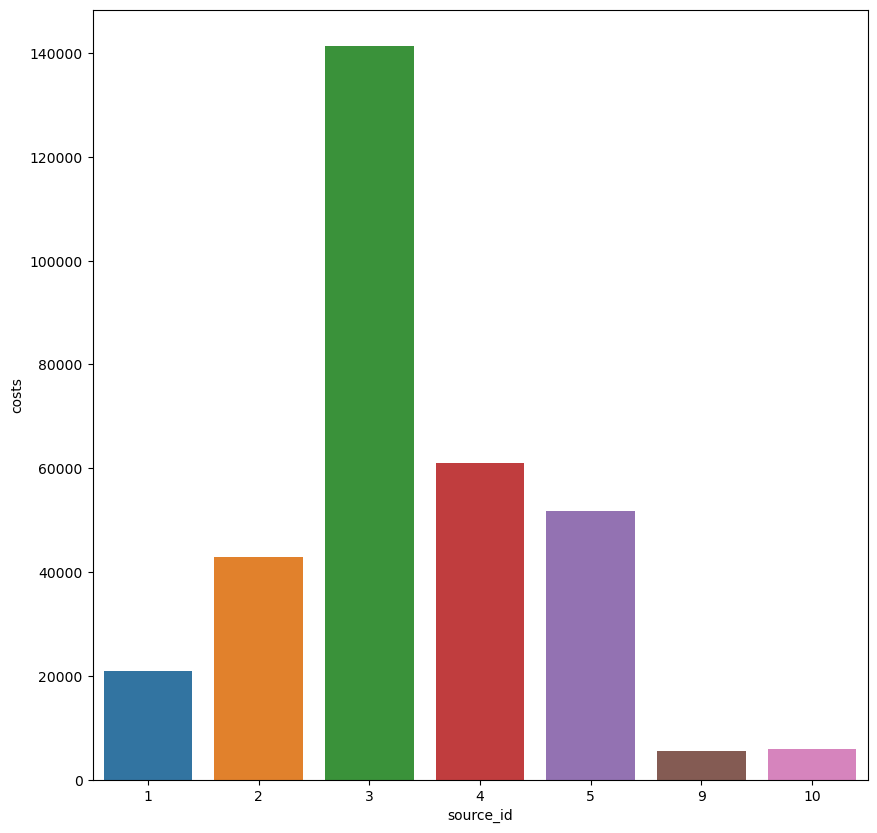

In [25]:
#per sumber
source = data_costs.groupby('source_id')['costs'].sum().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data=source,x='source_id',y='costs')


menampilkan masing- masing biaya yang dihabiskan untuk setiap source, terlihar jumlah source 3 paling banyak diinvestasikan untuk biaya pemasaran yang hasilnya mencapai 140000$

In [26]:
data_costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<AxesSubplot:xlabel='dt', ylabel='costs'>

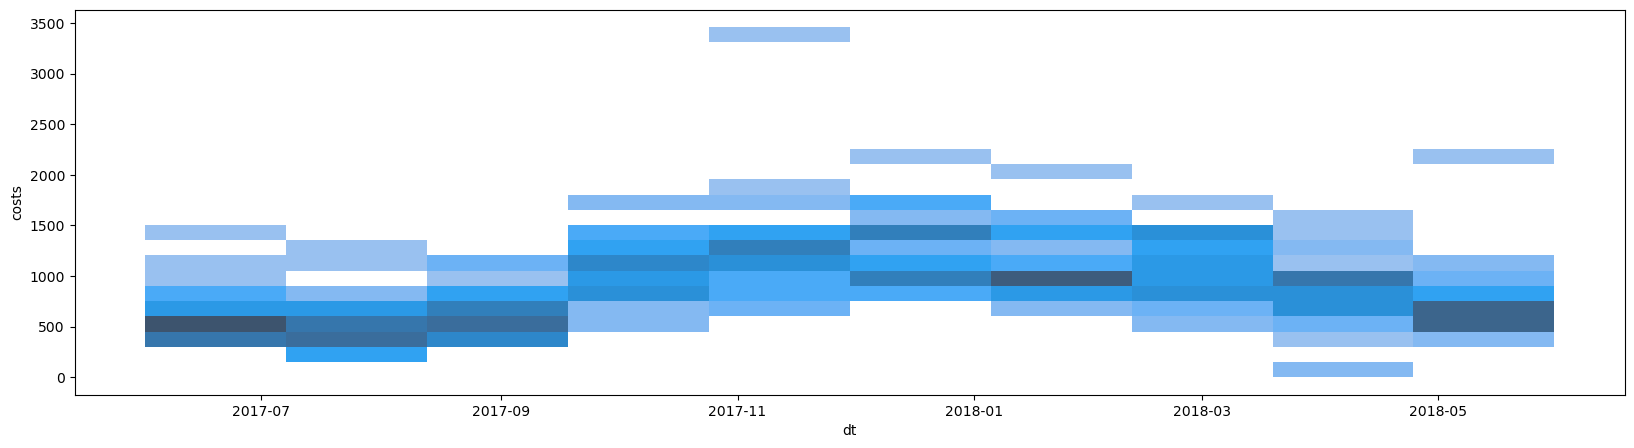

In [27]:
#dari waktu ke waktu (bulanan)
time = data_costs.groupby('dt')['costs'].sum().reset_index()
plt.figure(figsize=(20,5))
sns.histplot(data=time,x='dt',y='costs')

total biaya yang dihabiskan setiap bulan untuk melakukan pengeluaran pemasaran, paling tinggi ada di bulan 11 tahun 2017 yang biaya yang dilakukan untuk pemasaran sampai 3500$

<Figure size 1000x500 with 0 Axes>

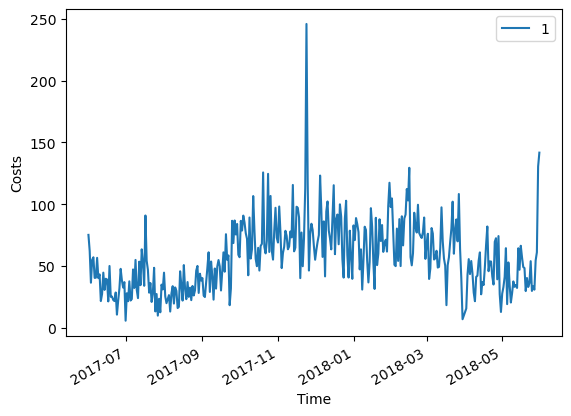

<Figure size 1000x500 with 0 Axes>

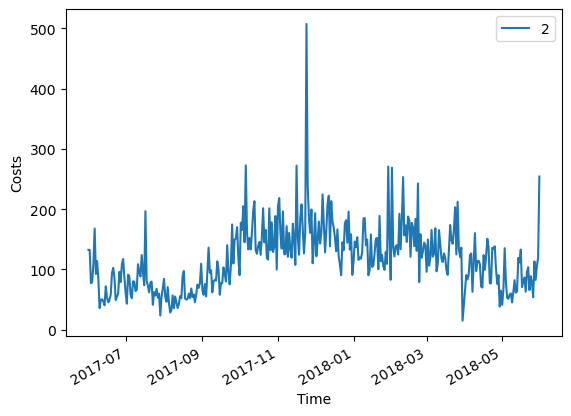

<Figure size 1000x500 with 0 Axes>

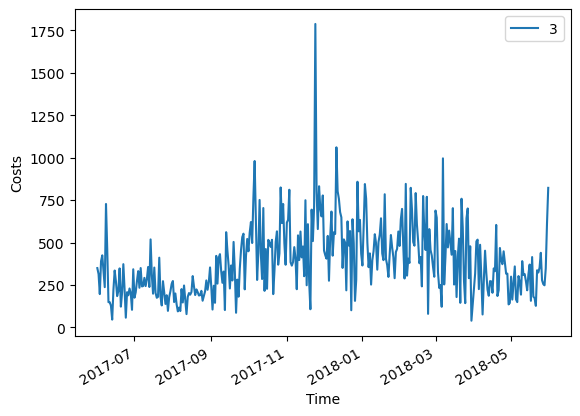

<Figure size 1000x500 with 0 Axes>

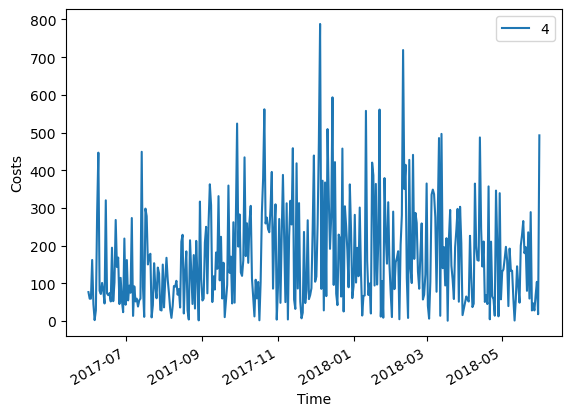

<Figure size 1000x500 with 0 Axes>

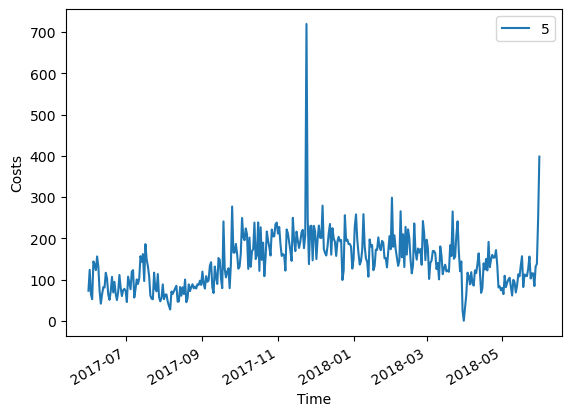

<Figure size 1000x500 with 0 Axes>

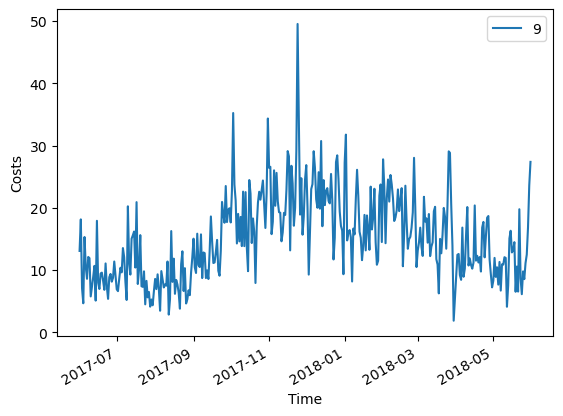

<Figure size 1000x500 with 0 Axes>

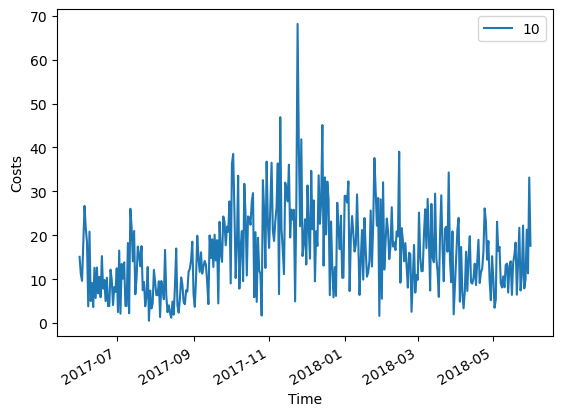

In [28]:
#berdasarkan waktu & channel
param = data_costs['source_id'].unique()
for i in param:
    plt.figure(figsize=(10,5))
    data_costs[data_costs['source_id']==i].plot(x='dt',y='costs',label=i)
    plt.xlabel('Time')
    plt.ylabel('Costs')


menampilkan biaya pemasaran yang dikeluarkan setiap bulan berdasarkan sourcenya,terlihat untuk source 3 menghabiskan biaya yang paling banyak untuk pemasarannya, terlihat juga untuk pola kenaikan dari bulan ke bulan sama, hanya berbeda total cost yang dikeluarkan

## Berapa biaya akuisisi pelanggan dari masing-masing sumber?


In [29]:
#mencari ROI aku sisi pelanggan,berdasarkan rentan periode data
total_customer = data_visits.groupby('source id')['uid'].nunique()
total_revenue = data_costs.groupby('source_id')['costs'].sum()
cac = total_revenue/total_customer
cac

1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
6          NaN
7          NaN
9     0.595584
10    0.721766
dtype: float64

untuk mencari biaya akusisi saya mengelompokkan pelanggan berdasarkan masing masing source id dan mencari total pelanggan dan total uang yang dihabiskan pelanggan tersebut lalu mencari rata-rata biaya akusisi pelanggan per source

## Seberapa menguntungkannya investasi tersebut? (ROI)

In [30]:
#megelompokkan customer berdasarkan source_id(sumber iklan) dan membuatnya sebagai dict yang nantinya dict ini digunakan untuk
#melihat di dataset orders masing masing pelanggan tergabung di source_id mana
source = data_visits[['uid','source id']].drop_duplicates().set_index('uid').to_dict()['source id']
source

{16879256277535980062: 4,
 104060357244891740: 2,
 7459035603376831527: 5,
 16174680259334210214: 4,
 9969694820036681168: 3,
 16007536194108375387: 4,
 6661610529277171451: 5,
 11423865690854540312: 3,
 2987360259350925644: 3,
 1289240080042562063: 5,
 14879997728223227242: 3,
 7478054213403174082: 3,
 8056418121947262981: 10,
 1989613820989570316: 3,
 18026419100367255411: 3,
 18188358787673499603: 3,
 13958332529722257330: 2,
 7415904268540941371: 3,
 17023906935283809754: 10,
 14243397340327062268: 5,
 3290526361933478358: 4,
 9772781220677269425: 3,
 10245950763288728156: 5,
 11451610027598174149: 2,
 12375289438043468944: 4,
 2307401184189569202: 9,
 920985734427329716: 5,
 4499746016005494365: 1,
 17892541477379911957: 4,
 18126128709986695755: 4,
 2655976123871714644: 3,
 10160380139945840521: 4,
 13410401624913285510: 4,
 11265166683832042552: 4,
 16458761471338263014: 4,
 16790137079617451989: 3,
 63137637277926835: 4,
 15857957287537270437: 1,
 15763368622958393183: 5,
 1094

In [31]:
#melakukan pemetaan sehingga diketahui setiap customer tergabung di source_id yang mana
data_orders['sources'] = data_orders['uid'].map(source)

In [32]:
#invesment per channel, menghitung total uang yang didapat berdasarkan uang dihabiskan customer untuk setiap source_id
channel_revenue = data_orders.groupby('sources')['revenue'].sum()
channel_revenue

sources
1     30312.67
2     27915.65
3     60039.41
4     69783.65
5     50678.46
7         1.22
9      8121.91
10     5204.23
Name: revenue, dtype: float64

In [33]:
#menghitung total biaya yang dikeluarkan untuk melakukan pemasaran di setiap source_id
channel_invest = data_costs.groupby('source_id')['costs'].sum()
channel_invest

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [34]:
#mencari roi nya untuk setiap channel apakah mendapat keuntungan atau tidak, ternyata yang paling menguntungkan adalah
#pelanggan di source_id 3 karena kenaikan roi sampai dengan 135%
((channel_invest-channel_revenue)/channel_revenue)*100

1     -31.272072
2      53.340653
3     135.381444
4     -12.481505
5       2.128399
7            NaN
9     -32.066595
10     11.879952
dtype: float64

# Kesimpulan

1. untuk rata-rata pendapatan diwaktu tertentu mengalami kenaikan, contohnya di bulan 11-12 mungkin karena ada event natal, sehingga banyak pelanggan yang melakukan pembelian barang disitu
2. untuk total barang yang dibeli setiap bulan menurun, mungkin karena customer merasa barang tidak ada yang baru dan malas membeli barang yang itu-itu saja
3. source_id(iklan) berpengaruh pada pelanggan, misalnya pada source_id 3 lebih banyak menghasilkan revenue dari pelanggan, sehingga memaksimalkan promosi pemasaran pada source_id ini karena revenue yang didapat dari pelanggan juga menguntungkan
4. untuk ROI source_id 3 yang paling menguntugkan dengan kenaikan 135%

# Saran
1. menambah barang jenis baru sehingga jumlah pembelian barang meningkat dan tentu jika total pembelian meningkat revenue yang dihasilkan juga pasti akan meningkat
2. mengingkatkan pemasaran di source_id lain, sebelumnya menganalisis kenapa ada yang hasilnya minus

